In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [13]:
data=np.load('D:/data science/Module-2/data/data_pca_50_y_mean.pickle.npz',allow_pickle=True)

In [14]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [16]:
X=data['arr_0']
y=data['arr_1']
mean=data['arr_2']

In [84]:
mean

array(<built-in method mean of numpy.ndarray object at 0x00000141E6536AD0>,
      dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4364, 50), (1091, 50), (4364,), (1091,))

# Training the Model

In [21]:
from sklearn.svm import SVC

In [27]:
model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [28]:
model.fit(x_train,y_train)
print('Trained Succesfully')

Trained Succesfully


In [29]:
model.score(x_train,y_train)

0.8638863428047663

In [30]:
model.score(x_test,y_test)

0.7983501374885427

# Model Evaluation
-Confusion Matrix
-Classification Report
-Kappa Score
-ROC and AUC

In [31]:
from sklearn import metrics

In [32]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

Text(0, 0.5, 'True Values')

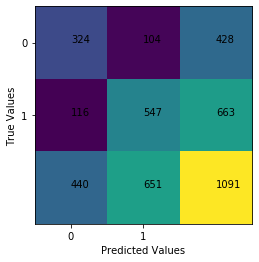

In [43]:
cm=metrics.confusion_matrix(y_test,y_pred)

cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')



In [46]:
cr=metrics.classification_report(y_test,y_pred,target_names=['Male','Female'],output_dict=True)
df=pd.DataFrame(cr).T
df

,precision,recall,f1-score,support
Male,0.757009,0.736364,0.746544,440.00000
Female,0.825038,0.840246,0.832572,651.00000
accuracy,0.798350,0.798350,0.798350,0.79835
macro avg,0.791024,0.788305,0.789558,1091.00000
weighted avg,0.797602,0.798350,0.797877,1091.00000


In [48]:
#kappa should be more than 60%
metrics.cohen_kappa_score(y_test,y_pred)

0.5791692089741701

Text(0, 0.5, 'True Positive Rate')

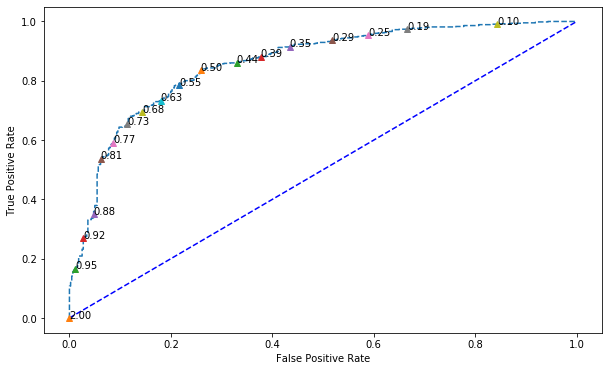

In [53]:
#roc and auc
plt.figure(figsize=(10,6))
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Hyper Parameter Tuning

In [54]:
model_tune=SVC()

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid={'C':[1,10,20,30,50,100],'kernel':['rbf','poly'],'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],'coef0':[0,1]}

In [60]:
model_grid=GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [61]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 39.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [67]:
model_grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [69]:
model_grid.best_score_

0.7792850595783685

In [73]:
#with best parameter build the Ml Model
model_best=SVC(C=1,kernel='rbf',gamma=0.05,probability=True)

In [74]:
model_best.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [75]:
model_best.score(x_test,y_test)

0.8203483043079743

In [76]:
y_pred=model_best.predict(x_test)
y_prob=model_best.predict_proba(x_test)

Text(0, 0.5, 'True Values')

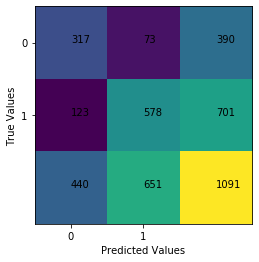

In [77]:
cm=metrics.confusion_matrix(y_test,y_pred)

cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')


In [78]:
cr=metrics.classification_report(y_test,y_pred,target_names=['Male','Female'],output_dict=True)
df=pd.DataFrame(cr).T
df

,precision,recall,f1-score,support
Male,0.812821,0.720455,0.763855,440.000000
Female,0.824536,0.887865,0.855030,651.000000
accuracy,0.820348,0.820348,0.820348,0.820348
macro avg,0.818678,0.804160,0.809443,1091.000000
weighted avg,0.819811,0.820348,0.818259,1091.000000


Text(0, 0.5, 'True Positive Rate')

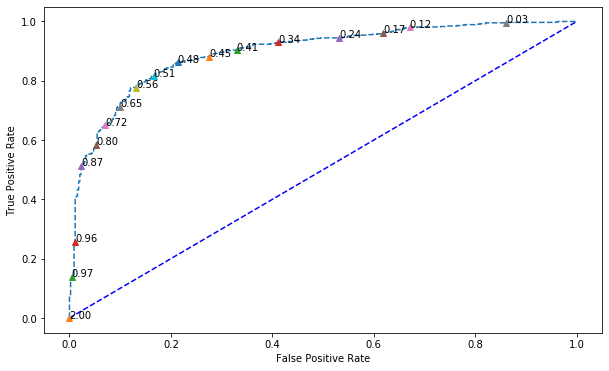

In [79]:
#roc and auc
plt.figure(figsize=(10,6))
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [80]:
#kappa should be more than 60%
metrics.cohen_kappa_score(y_test,y_pred)

0.619732185727242

In [81]:
#save machine learning model
import pickle


In [82]:
pickle.dump(model_best,open('D:/data science/Module-2/data/model_svm.pickle','wb'))

In [85]:
pickle.dump(mean,open('D:/data science/Module-2/data/mean_preprocess.pickle','wb'))